# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
from __future__ import print_function, division

import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
from numpy import array

df = pd.read_csv('data/human_body_temperature.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### Get mean, and standard deviation of people sample

In [3]:
avg_temp = df.temperature.mean()
temp_std = df.temperature.std()

def sdp(std_number):
    more = avg_temp + (temp_std * std_number)
    less = avg_temp - (temp_std * std_number)
    temp_range = (df['temperature'] < more) & (df['temperature'] > less)
    
    count = df.loc[temp_range]['temperature'].count()
    
    return count/130

avg_temp

98.24923076923078

In [4]:
one_sdp = sdp(1)
two_sdp = sdp(2)
three_sdp = sdp(3)

sdp_range = '{} - {} - {}'.format(one_sdp, two_sdp, three_sdp)
sdp_range

'0.6923076923076923 - 0.9461538461538461 - 0.9923076923076923'

### The distribution is normal because the percent of the sample within 1, 2, and 3 standard deviations from the mean is about 69%, 95%, and 99.7% as mentioned above.

### Observations are independent

### Sample is large

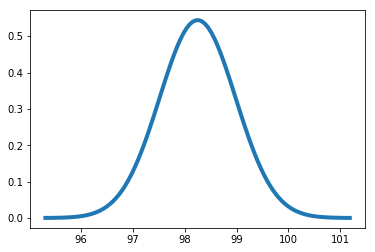

In [5]:
# A sample of 130 people and their gender, heart_rate, and body temperature

# Create distribution from data getting the mean, quartiles, min, max, and standard deviation
temp_dist = scipy.stats.norm(avg_temp, temp_std)

def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

xs, ys = eval_pdf(temp_dist)
plt.plot(xs, ys, label='male', linewidth=4)
plt.show()

### 1) Repeat sample model 100 times and get a distribution of sampling means
### 2) The mean of that distribution should be very close to the true mean
### 3) Get standard deviation of population by dividing std of sample by sqrt of sample size

In [6]:
pop_std = temp_std/130**.5
pop_std

0.06430441683789101

### Get distribution of sample means, resampled 10000 times.

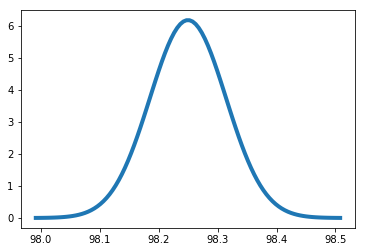

In [7]:
def summarize_sampling_distribution(sample_stats):
    print('SE', sample_stats.std())
    print('90% CI', np.percentile(sample_stats, [5, 95]))
    
def create_sampling_dist(sample, resamples=1000):
    sample_means = [np.random.choice(sample, len(sample), replace=True).mean() for i in range(resamples)]
    return sample_means

sample_means = create_sampling_dist(df.temperature, 10000)
sm_dev = array(sample_means).std()
sm_mean = array(sample_means).mean()

sm_dist = scipy.stats.norm(sm_mean, sm_dev)

xs, ys = eval_pdf(sm_dist)
plt.plot(xs, ys, label='sample statistic', linewidth=4)
plt.show()

In [8]:
sample_variance = df.temperature.var()
sample_variance**.5

0.7331831580389454

In [9]:
temp_std

0.7331831580389454

In [11]:
# Standard deviation of population is std of sample divided by square root of sample size

x = temp_std/130**.5
y = x * 2.58
high_confidence_pop_mean = '{} - {}'.format(avg_temp - y, avg_temp + y)
high_confidence_pop_mean

'98.08332537378902 - 98.41513616467253'

## 99% confident that average body temperature of entire planet lies somewhere between 98.08 and 98.41 degrees

# Answers
### 1) Yes the distribution of body temperatures is normal because the sample size is considered large, and the percent of the sample within 1, 2, and 3 standard deviations from the mean is about 69%, 95%, and 99.7%.
### 2) The sample size is large, because not only is it larger than 30, considered to be a good threshold for whats large and small, it is also over 100.
### 3) After getting a 99% confidence interval for the mean of body temperatures from a true population of men and women, we can be 99% confident that average body temperatures lie somewhere between 98.08 and 98.41 degrees. Also after resampling the sample 10000 times, we found that the mean of the resampling distribution "A strong shot at the mean of the true population" is also between 98.2 and 98.3. 
    * Was this meant to be one tailed vs. two tailed ?
    * In this example its good to use Z-Statistics because the sample size is large enough for us to do so.
    * Find out how to get T-Stat with Scikit Learn.
### 4) Since we can safely say with 99% confidence that any sample randomly selected from the true population will be somewhere between 98.08 and 98.41 degrees, it should be considered 'Abnormal' that we someone has an average body temperature above or below that. 
### 5) Yes, we can see that from getting a sampling distribution of the difference of means for men and women, we can create a 95% confidence interval that tells us the true difference between men and women, is anywhere between about -2, and +2 which doesn't sound like a lot but is extremely considerable considering anything more than 2 degrees above the normal body temperature is approaching a fever.
    * I used a two tailed, Z-stats test because were looking for the most extreme difference on both ends of the distribution since its a distribution of the DIFFERENCE of the means, and since the sample size for the seperated male and female chunks of our sample was still over 30 so it was considered large enough.

## Conclusion = With a normally distributed large sample of 130 men and women, we can conclude that the average body temperature is highly unlikely to be 98.6 degrees since with confidence we can say that 99% of any random person chosen from anywhere in the world will be between about 98.1, and 98.4 degrees. This also means that anyone with a body temperature under or above 98.1 to 98.4 degrees should be considered abnormal. There is a considerable difference between a man and a females average body temperatures however, ranging between about 2 degrees above and below a man's average body temperature.  

### Things to do better - Find out P-Value for how likely sample female difference of mean was due to sampling chance.

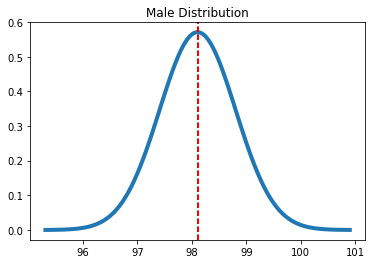

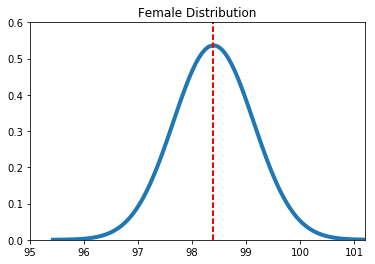

In [58]:
male_temps = df.loc[df['gender'] == 'M']
female_temps = df.loc[df['gender'] == 'F']

avg_fem = female_temps.temperature.mean()
fem_std = female_temps.temperature.std()

avg_mal = male_temps.temperature.mean()
mal_std = male_temps.temperature.std()

male_dist = scipy.stats.norm(avg_mal, mal_std)
female_dist = scipy.stats.norm(avg_fem, fem_std)

def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

mxs, mys = eval_pdf(male_dist)
plt.plot(mxs, mys, label='male', linewidth=4)
plt.title('Male Distribution')
plt.axvline(mxs.mean(), color='r', linestyle='dashed', linewidth=2)
plt.show()

fxs, fys = eval_pdf(female_dist)
plt.plot(fxs, fys, label='female', linewidth=4)
plt.title('Female Distribution')
plt.axvline(fxs.mean(), color='r', linestyle='dashed', linewidth=2)
plt.axis([95, 101.2, 0, .6])
plt.show()

In [101]:
# Difference Sampling Distribution
samp_diff_mean = avg_fem - avg_mal
samp_diff_mean

mal_var = male_temps.temperature.var()
fem_var = female_temps.temperature.var()

samp_diff_std = (mal_var + fem_var)**.5
samp_diff_std

# A 95% confidence interval will be 1.96 standard deviations from the mean in both directions
stds_value = 1.02 * 1.96
interval = '{} - {}'.format(samp_diff_mean - stds_value, samp_diff_mean + stds_value)
interval

# Using the sample, we can be confident that 95% of all samples from a distribution of the differences of the 
# True male and female population will be somewhere between -1.71, and 2.29

'-1.709969230769273 - 2.288430769230727'

# Sanity Check

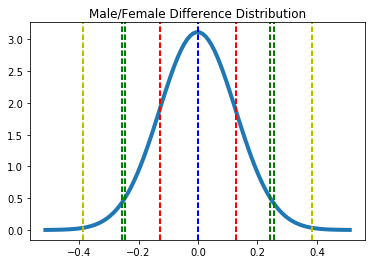

In [100]:
def summarize_sampling_distribution(sample_stats):
    print('SE', sample_stats.std())
    print('90% CI', np.percentile(sample_stats, [5, 95]))
    
def create_sampling_diff_dist(sample1, sample2, resamples=1000):
    s1_means = [np.random.choice(sample1, len(sample1), replace=True).mean() for i in range(resamples)]
    s2_means = [np.random.choice(sample1, len(sample2), replace=True).mean() for i in range(resamples)]
    sample_diff_means = [(x[0] - x[1]) for x in zip(s1_means, s2_means)]
    
    return sample_diff_means

zip_diffs = create_sampling_diff_dist(female_temps.temperature, male_temps.temperature)

sample_diff_means = create_sampling_diff_dist(female_temps.temperature, male_temps.temperature)
diff_dev = array(sample_diff_means).std()
diff_mean = array(sample_diff_means).mean()

diff_dist = scipy.stats.norm(diff_mean, diff_dev)

xs, ys = eval_pdf(diff_dist)
plt.plot(xs, ys, label='sample statistic', linewidth=4)
plt.axvline(xs.mean(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(diff_dist.mean() - diff_dist.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(diff_dist.mean() + diff_dist.std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(diff_dist.mean() - (diff_dist.std() * 1.9), color='g', linestyle='dashed', linewidth=2)
plt.axvline(diff_dist.mean() + (diff_dist.std() * 1.9), color='g', linestyle='dashed', linewidth=2)
plt.axvline(diff_dist.mean() - (diff_dist.std() * 2), color='g', linestyle='dashed', linewidth=2)
plt.axvline(diff_dist.mean() + (diff_dist.std() * 2), color='g', linestyle='dashed', linewidth=2)
plt.axvline(diff_dist.mean() - (diff_dist.std() * 3), color='y', linestyle='dashed', linewidth=2)
plt.axvline(diff_dist.mean() + (diff_dist.std() * 3), color='y', linestyle='dashed', linewidth=2)
plt.title('Male/Female Difference Distribution')
plt.show()